## 1. Введение в базы данных (далее БД)

Хранение информации на компьютере - давно привычное явление. Люди хранят пароли в текстовых файлах, документы в формате Word, однако такая организация хранения мало пригодна при большом объеме информации по нескольким причинам:
   - в них много дублирования, из-за чего требуется значительно больше места на жестком диске,
   - а поиск работает медленно и слишком «дорогой» при сколько-либо значимом количестве обращений.
   
Разработчики промышленного программного обеспечения столкнулись с этими проблемами достаточно давно, и в качестве одного из решений еще в 1970 году Эдгар Кодд предложил реляционную модель данных (файловые базы данных появились еще раньше — в 1955 году).
Эта идея развилась в привычные сегодня для почти каждого программиста реляционные базы данных (БД).
База данных — это непосредственное хранилище информации, которое без инструментов для взаимодействия с ним не очень то и полезно. Такой интерфейс для общения с БД разработчикам и системным администраторам предоставляет специальное программное обеспечение — Системы управления базами данных (СУБД).

## 2. Пример подключения к базе данных
Мы будем работать с базами данных и языком SQL с помощью Python.
Так как различных СУБД достаточно много, крайне неудобно было бы, если при переходе на новую СУБД приходилось бы с нуля изучать библиотеку для работы с ней. Чтобы избежать таких ситуаций, есть специальный стандарт PEP 249 (Python Database API Specification v2.0), в котором, помимо всего прочего, описано, какой интерфейс должна предоставлять программисту любая библиотека для работы с базами данных. Поэтому, какую бы СУБД вы не выбрали для управления хранением данных вашего приложения, принципы работы с ней будут очень похожи.

PEP 249 оперирует такими понятиями, как подключения и курсоры:

- Подключение — объект, в котором чаще всего указывается либо путь к файлу, либо путь к серверу. Он отвечает только за подключение к БД и, соответственно, отключение от нее
- Курсор — объект, в котором непосредственно производится работа с БД

In [15]:
import sqlite3

Ниже приведены 2 ячейки, которые выполняют загрузку баз данных по странам и фильмам в среду Google Colab. После запуска этих ячеек базы будут загружены и с ними можно будет работать с помощью библиотеки sqlite3.

In [16]:
!wget https://github.com/epidersis/moodle_data_analysis_repo/raw/main/"2.4.2 Основы SQL"/films_db.db

--2024-08-26 23:42:11--  https://github.com/epidersis/moodle_data_analysis_repo/raw/main/2.4.2%20%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B%20SQL/films_db.db
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/epidersis/moodle_data_analysis_repo/main/2.4.2%20%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B%20SQL/films_db.db [following]
--2024-08-26 23:42:12--  https://raw.githubusercontent.com/epidersis/moodle_data_analysis_repo/main/2.4.2%20%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B%20SQL/films_db.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1835008 (1.8M) [application/octet-stream]
Saving to: ‘films_db.db.1’

films

In [17]:
!wget https://github.com/epidersis/moodle_data_analysis_repo/raw/main/"2.4.2 Основы SQL"/countries.db

--2024-08-26 23:42:12--  https://github.com/epidersis/moodle_data_analysis_repo/raw/main/2.4.2%20%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B%20SQL/countries.db
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/epidersis/moodle_data_analysis_repo/main/2.4.2%20%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B%20SQL/countries.db [following]
--2024-08-26 23:42:12--  https://raw.githubusercontent.com/epidersis/moodle_data_analysis_repo/main/2.4.2%20%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B%20SQL/countries.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36864 (36K) [application/octet-stream]
Saving to: ‘countries.db.1’

coun

Содержание БД по странам

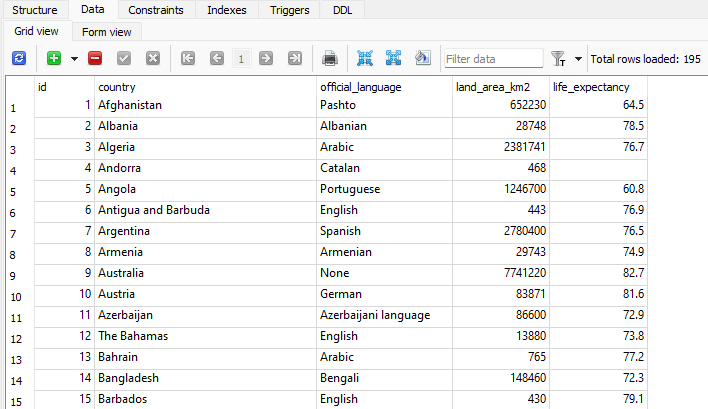

Структура данных

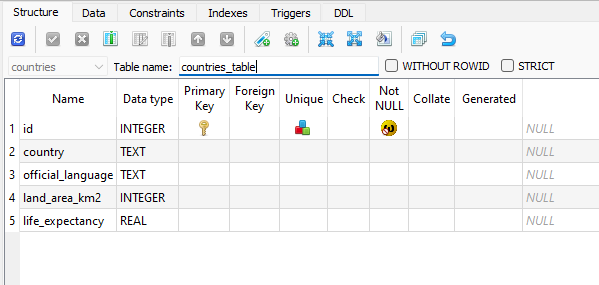

БД "Фильмы" состоит из двух таблиц films и genres. В films указаны фильмы, в таблице genres - жанры.

Структура и содержание таблицы films

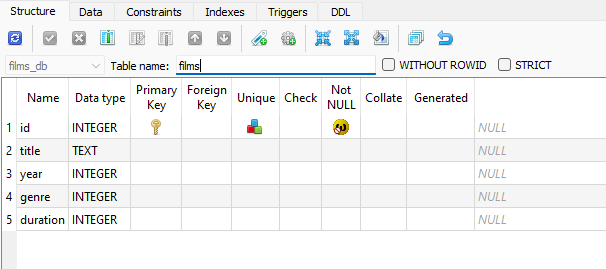

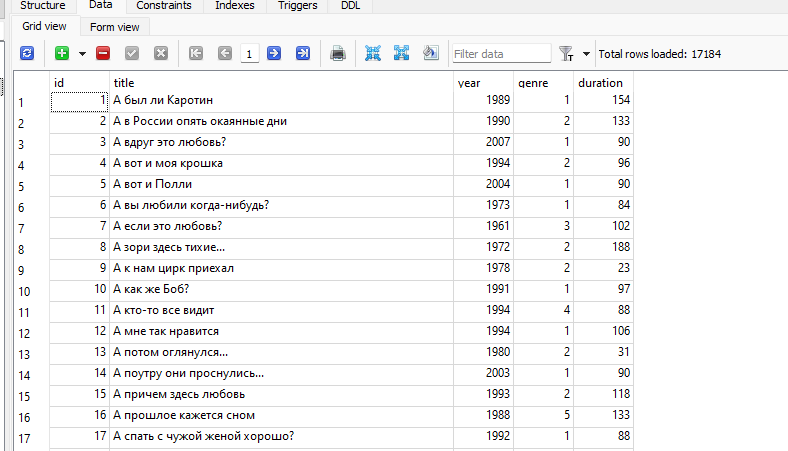

Структура и содержание таблицы genres

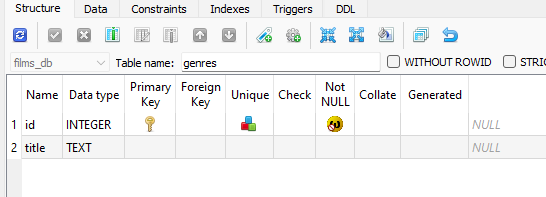

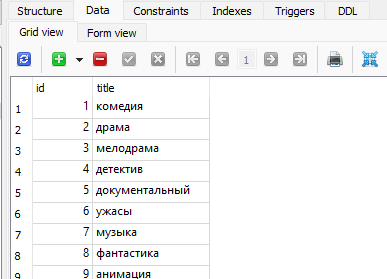

Необходимость в наличии двух таблиц обусловлена тем, что у каждого фильма есть свой жанр, но хранить его в виде текста с названием жанра в записи каждого фильма - лишние затраты памяти. Вместо того, чтобы писать, например, "комедия" в столбце жанра фильма таблицы films, можно указывать цифровой идентификатор жанра, а затем уже подтягивать текстовое название жанра из таблицы genres. Например, первая запись в таблице films выглядит так:

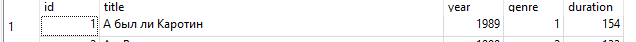

Тогда, если обратиться к таблице genres получаем, что это комедийный фильм.

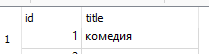

Далее приведем пример кода для подключения к базе данных. Основные моменты:
- Создание соединения
- Обработка отказа
- Создание курсора
- Выполнение запроса
- Обработка результатов

In [19]:
from sqlite3 import connect  # Импорт библиотек для работы с БД PostgreSQL (PostgreSQL является SQL совместимой БД)
from sqlite3 import OperationalError  # Обработчик ошибок
import pandas as pd
import numpy as np

try:  # Пытаемся совершить подключение к БД, с помощью параметров, выданных администратором сервера
    connection = connect("countries.db")
    cur = connection.cursor()  # Создаем курсор управления

    """Создаем и выполняем запрос с помощью языка SQL"""

    cur.execute("SELECT country, land_area_km2, life_expectancy, official_language FROM countries_table WHERE \
    official_language = 'Russian' AND land_area_km2 > 600000")

    result = cur.fetchall() # получаем результат

    # выведем результат
    for elem in result:
      print(elem)
    # для запроса SELECT connection.commit() необязателен, однако все запросы, которые
    # удаляют (DELETE), изменяют (UPDATE), добавляют (INSERT) данные, требуют подтверждения транзакции
    # commit с английского значит "подтвердить, зафиксировать". Мы изменяем что-то в БД
    # и затем подтверждаем это изменение
    connection.commit()
    connection.close()  # Не забываем закрыть соединение, иначе мы или другой пользователь может не попасть в следующую сессию

except OperationalError as error:  # В случае отказа - выводим предполагаемую причину
    print(f'Ошибка подключения к БД: {error}')


('Kazakhstan', 2724900, 73.2, 'Russian')
('Russia', 17098240, 72.7, 'Russian')


Как можно заметить, результат запроса — это список кортежей.

Метод .fetchall() возвращает все полученные элементы. Существует еще метод .fetchone(), возвращающий, как несложно догадаться, только первый элемент, и метод .fetchmany(n), возвращающий n первых записей.

Для запросов очень часто необходимо указывать какие-либо параметры, в нашем случае: год выпуска, продолжительность фильма и т. д. Для этого существует удобный синтаксис. Вместо значения в запросе указывается знак процента и s (%s), а затем вторым параметром в итерируемом объекте (чаще всего в кортеже) указываются необходимые значения для подстановки.

```SQL
result = cur.execute("""SELECT * FROM films
            WHERE year = %s and duration > %s""", (2010, 90)).fetchall()
```

**Важно не забыть, что, если мы указываем кортеж из одного элемента, нам все равно необходимо после него поставить запятую.**

```SQL
result = cur.execute("""SELECT * FROM Films
            WHERE year = %s""", (2009,)).fetchall()
```

## 3. Основы SQL

### 3.1 films_db.sqlite
Итак у нас есть база данных films_db. Давайте сначала посмотрим, как она выглядит в виде визуализации:

<img src="https://yastatic.net/s3/lyceum/content/images/second-year/pyqt-6/qt-6-1.png" alt="drawing" width="200"/>

Такие визуализации используют достаточно часто для наглядного представления таблиц и связей, и называются они ER-диаграммами (сокращение от Entity-Relation или Сущность-Отношение).

Итак, разберем, что есть в нашей базе данных. Есть две таблицы-сущности: **films** для хранения информации о фильмах и **genres** для хранения информации о жанрах. Таблица **genres** состоит всего из двух полей: **id и title**, в которых для каждого жанра хранится его идентификатор и название соответственно.

Таблица films чуть сложнее. Там есть поля **id, title, year, genre, duration** для хранения идентификатора фильма, его названия, года выпуска, идентификатора жанра и длительности в минутах.

Кроме того, как видно на диаграмме, между таблицами есть связь, которая говорит о том, что номер жанра **genre** у записи **films** соответствует записи в таблице **genres** с таким же значением идентификатора.

Для работы с базами данных был придуман специальный язык — **SQL** (structured query language — «язык структурированных запросов»).

### 3.2 Язык SQL
Основной командой для получения какой-либо информации из БД является команда SELECT. Ее базовый синтаксис выглядит так:

```SQL
SELECT перечень_полей FROM имя_таблицы
        WHERE условие
```

Кроме этого, есть и различные модификаторы этой команды. Например, ORDER BY ПОЛЕ — тогда результаты будут выведены в отсортированном виде по заданному полю или нескольким полям, а в условии может быть вложенный запрос.

Напишем наш первый запрос. Получим все фильмы, выпущенные в 2010 году.
```SQL
SELECT * FROM Films
    WHERE year = 2010
```
<img src="https://yastatic.net/s3/lyceum/content/images/second-year/pyqt-6/qt-6-5.png" alt="drawing" width="250"/>

### Пример запроса к базе данных с фильмами

In [21]:
from sqlite3 import connect
from sqlite3 import OperationalError
import numpy as np

try:
    connection = connect("films_db.db")
    cur = connection.cursor()  # Создаем курсор управления

    """Создаем и выполняем запрос с помощью языка SQL"""

    cur.execute("SELECT * FROM Films WHERE duration < 40")

    result = cur.fetchall() # получаем результат

    # Выводим результат запроса с ограничением в 10 записей
    for elem in result[:10]:
      print(elem)
    connection.commit()
    connection.close()  # Не забываем закрыть соединение, иначе мы или другой пользователь может не попасть в следующую сессию

except OperationalError as error:  # В случае отказа - выводим предполагаемую причину
    print(f'Ошибка подключения к БД: {error}')

(9, 'А к нам цирк приехал', 1978, 2, 23)
(13, 'А потом оглянулся...', 1980, 2, 31)
(243, 'Али-баба и сорок разбойников', 1959, 16, 28)
(370, 'Ангел', 2007, 9, 6)
(409, 'Андалузский пес', 1928, 2, 33)
(430, 'Анна Каренина', 2007, 2, 29)
(459, 'Антракт', 1924, 2, 14)
(600, 'Бабушка удава', 1979, 16, 8)
(700, 'Банный день', 2008, 5, 29)
(935, 'Бензоколонка', 2000, 21, 28)


У кода выше есть один недостаток - сначала запрашиваются все данные, затем выводятся только 10 записей. На таблицах с миллионами строк это может быть лишним расходом времени и памяти, поэтому при желании можно ограничить количество получаемых записей в самом SQL-запросе с помощью команды LIMIT число_записей. Посмотрите пример ниже

In [23]:
from sqlite3 import connect
from sqlite3 import OperationalError
import numpy as np

try:
    connection = connect("films_db.db")
    cur = connection.cursor()  # Создаем курсор управления

    """Создаем и выполняем запрос с помощью языка SQL"""

    cur.execute("SELECT * FROM Films WHERE duration < 40 LIMIT 10")

    result = cur.fetchall() # получаем результат

    # Выводим результат запроса с ограничением в 10 записей
    for elem in result:
      print(elem)
    connection.commit()
    connection.close()  # Не забываем закрыть соединение, иначе мы или другой пользователь может не попасть в следующую сессию

except OperationalError as error:  # В случае отказа - выводим предполагаемую причину
    print(f'Ошибка подключения к БД: {error}')

(9, 'А к нам цирк приехал', 1978, 2, 23)
(13, 'А потом оглянулся...', 1980, 2, 31)
(243, 'Али-баба и сорок разбойников', 1959, 16, 28)
(370, 'Ангел', 2007, 9, 6)
(409, 'Андалузский пес', 1928, 2, 33)
(430, 'Анна Каренина', 2007, 2, 29)
(459, 'Антракт', 1924, 2, 14)
(600, 'Бабушка удава', 1979, 16, 8)
(700, 'Банный день', 2008, 5, 29)
(935, 'Бензоколонка', 2000, 21, 28)


### 3.3 Задание 1
- Подключитесь к базе данных: films_db
- Получите все фильмы, выпущенные в 2010 году
- Выведите первые 10 фильмов из DataFrame

In [24]:
from sqlite3 import connect
from sqlite3 import OperationalError
import pandas as pd
import numpy as np

# Ваш код пишем тут

"""
Используйте пример кода выше
"""

'\nИспользуйте пример кода выше\n'

### 3.4 Задание 2

Условий может быть и несколько: работают все знакомые нам логические операторы NOT, AND и OR. Например, выберем фильмы, выпущенные после 2005 года с продолжительностью от 40 минут до 1,5 часов:
```SQL
SELECT * FROM Films
    WHERE year > 2005 AND duration >= 45 AND duration <= 90
```

<img src="https://yastatic.net/s3/lyceum/content/images/second-year/pyqt-6/qt-6-6.png" alt="drawing" width="700"/>


#### **Практика**
- Подключитесь к базе данных: films_db
- Получите все фильмы, выпущенные после 2005 года с продолжительностью от 40 минут до 1,5 часов
- Выведите первые 20 фильмов из DataFrame

In [9]:
# Ваш код пишем тут


"""
Используйте код из 1-го задания
"""

'\nИспользуйте код из 1-го задания\n'

### 3.5 Задание 3 - Запросы по 2-м таблицам

А как вывести все фильмы определенного жанра, например, фантастика? Конечно, можно сходить в таблицу genres и посмотреть, какой id у жанра фантастика, а потом написать запрос вроде такого:

```SQL
SELECT title FROM films
    WHERE genre = 8
```

Но это плохой путь, потому что через некоторое время данные могут измениться, и id у фантастики может стать другим, тогда наш запрос будет давать ошибочный результат. Поэтому правильным решением в данной ситуации будет написать подзапрос, который сам найдет нам необходимое значение id.

```SQL
SELECT title FROM Films
    WHERE genre=(
SELECT id FROM genres
    WHERE title = 'фантастика')
```
Сначала выполнится внутренний запрос: из таблицы genres будет получен id для записи с title«Фантастика», а затем будет выполнено сравнение и выведен результат.

<img src="https://yastatic.net/s3/lyceum/content/images/second-year/pyqt-6/qt-6-1.png" alt="drawing" width="200"/>


#### **Практика**
- Подключитесь к базе данных: films_db
- Получите все фильмы в жанре "комедия" (если таковых не окажется - выберите жанр по вашему усмотрению, предварительно выведите все жанры из таблицы genres), выпущенные после 2007 года
- Выведите последние 5 фильмов

In [10]:
# Ваш код

### 3.6 Задание 4 - Фильтрация

Помимо того, может быть выполнено сравнение не с одним элементом, а проверка на попадание в список. Это делается с помощью уже знакомого нам оператора IN. Например, так можно выбрать фильмы, продолжительность которых строго 45 или 90 минут:

```SQL
SELECT title, duration FROM Films
WHERE duration IN (45, 90)
```

Кроме уже операторов знакомых нам по Python, SQL содержит еще и ряд тех, которых в Python нет. Давайте рассмотрим несколько из них.

Оператор BETWEEN — проверяет, попадает ли заданное значение в диапазон (включая границы).

```SQL
SELECT * FROM Films
    WHERE (year > 2005) AND duration BETWEEN 45 AND 60
```

Оператор LIKE позволяет проверить, насколько похожа та или иная строка на заданный шаблон. Для шаблонов используются специальные символы:

% — обозначает любое количество, в том числе нулевое, любых символов
_ — обозначает один любой символ
Давайте получим список фильмов, у которых первая буква в названии — А и третья — к.
```SQL
SELECT * FROM Films
    WHERE title like 'А_к%'
```

<img src="https://yastatic.net/s3/lyceum/content/images/second-year/pyqt-6/qt-6-7.png" alt="drawing" width="400"/>

Оператор LIKE работает также в паре с NOT. Например, получим список фильмов, у которых третья буква в названии не равна д, а последняя не равна a.

```SQL
SELECT * FROM films
    WHERE title NOT LIKE '__д%а'
```
Кроме этого, есть возможность избавиться от повторов, используя в запросе специальный оператор — DISTINCT. Например, вот так можно получить список годов, в которые выходили фильмы в нашей базе данных, без повторений.
```SQL
SELECT DISTINCT year FROM Films
```

#### **Практика**
- Подключитесь к базе данных: films_db
- Напишите программу, которая выполняет запрос для получения списка фильмов, в названии которых упоминается Астерикс, но не упоминается Обеликс.
- Вывести необходимо все названия, каждое с новой строки.

In [11]:
# Ваш код




### 3.7 Задание 5 - Статистика

#### **Практика**
- Подключитесь с базе данных: films_db
- Напишите программу, которая находит все фильмы продолжительностью от 30 до 120 минут. Формат выборки полей films.title, genre.title (Название фильма, название жанра)
- Выведите основные статистические показатели
- Выведите фильм с кратчайшим названием
- Посчитайте количество добрых фильмов (содержащих корень "добр" в названии)
- Посчитайте количество злых ("зло") фильмов
- Посчитайте отношение добрых фильмов к злым


In [12]:
# Ваш код тут

### Самостоятельная работа (по желанию)
Ниже приведена ссылка на площадку с учебными базами данных. Например, вы можете попробовать загрузить базу данных world и попрактиковаться с ней в исполнении запросов.

https://prowebmastering.ru/sample-mysql-base.html

## SQL Style
Рекомендации по стилю написания запросов SQL

https://www.sqlstyle.guide/ru/